In [1]:
from datascience import *
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
# all sales data for parkwood
parkwood = Table.read_table('parkwood.csv')

In [3]:
# sales data for one bedroom in parkwood
parkwood1 = parkwood.where('Beds', are.equal_to(1))

In [4]:
# sales data for two bedroom in parkwood
parkwood2 = parkwood.where('Beds', are.equal_to(2))

In [5]:
# write a function to conver the str
def tonumber (x):
    y = x[1:4] + x[5:]
    return int(y)

In [6]:
newprice1 = parkwood1.apply(tonumber,'Price')
newprice2 = parkwood2.apply(tonumber,'Price')

In [7]:
def extractyear(x): 
    return x[2:]
excldate1 = parkwood1.apply(extractyear, 'Sale Date')
excldate2 = parkwood2.apply(extractyear, 'Sale Date')

In [8]:
parkwood1_newprice = parkwood1.with_columns('newprice', newprice1, 'year', excldate1)
parkwood2_newprice = parkwood2.with_columns('newprice', newprice2, 'year', excldate2)

In [9]:
year = ['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']

In [10]:
mean1all = []
for i in np.arange(15):
    parkwood1_year = parkwood1_newprice.where('year', are.containing(year[i])).where('Sq Ft', are.not_containing('853'))
    mean1_year = np.mean(parkwood1_year['newprice'])
    mean1all.append(mean1_year)

In [11]:
mean2all = []
for i in np.arange(15):
    parkwood2_year = parkwood2_newprice.where('year', are.containing(year[i])).where('Sq Ft', are.not_containing('1,239'))
    mean2_year = np.mean(parkwood2_year['newprice'])
    mean2all.append(mean2_year)

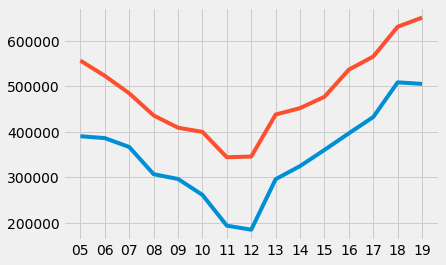

In [12]:
plots.plot(year, mean1all)
plots.plot(year, mean2all)

In [13]:
parkwood2_18 = parkwood2_newprice.where('year', are.containing('18')).where('Sq Ft', are.not_containing('1,239'))
parkwood2_19 = parkwood2_newprice.where('year', are.containing('19')).where('Sq Ft', are.not_containing('1,239'))

In [14]:
parkwood2_18

Unit#,Sale Date,Sq Ft,Beds,Baths,Partial Baths,Price,Price/sq ft,newprice,year
214,26-Nov-18,"1,119",2,2,0,"$625,000",$559,625000,-Nov-18
110,19-Oct-18,"1,095",2,2,0,"$640,000",$584,640000,-Oct-18
121,9-Oct-18,"1,119",2,2,0,"$625,000",$559,625000,Oct-18
109,20-Sep-18,"1,119",2,2,0,"$660,000",$590,660000,-Sep-18
303,17-Sep-18,"1,224",2,2,0,"$695,000",$568,695000,-Sep-18
208,13-Aug-18,"1,095",2,2,0,"$615,000",$562,615000,-Aug-18
115,31-Jul-18,"1,095",2,2,0,"$655,000",$598,655000,-Jul-18
321,16-Jul-18,"1,119",2,2,0,"$670,000",$599,670000,-Jul-18
213,31-May-18,"1,119",2,2,0,"$650,000",$581,650000,-May-18
110,15-Feb-18,"1,095",2,2,0,"$575,000",$525,575000,-Feb-18


In [15]:
parkwood2_19.show()

Unit#,Sale Date,Sq Ft,Beds,Baths,Partial Baths,Price,Price/sq ft,newprice,year
313,15-Oct-19,"1,119",2,2,0,"$740,000",$661,740000,-Oct-19
208,26-Sep-19,"1,095",2,2,0,"$655,000",$598,655000,-Sep-19
110,15-Aug-19,"1,119",2,2,0,"$650,000",$581,650000,-Aug-19
124,19-Jul-19,"1,058",2,2,0,"$627,000",$593,627000,-Jul-19
219,18-Jul-19,"1,058",2,2,0,"$640,000",$605,640000,-Jul-19
103,17-Jul-19,"1,058",2,2,0,"$650,000",$614,650000,-Jul-19
211,28-Jun-19,"1,119",2,2,0,"$635,000",$567,635000,-Jun-19
203,25-Jun-19,"1,058",2,2,0,"$645,000",$610,645000,-Jun-19
113,30-Apr-19,"1,119",2,2,0,"$655,000",$585,655000,-Apr-19
210,9-Apr-19,"1,095",2,2,0,"$639,000",$584,639000,Apr-19


In [16]:
parkwood1_17 = parkwood1_newprice.where('year', are.containing('17')).where('Sq Ft', are.not_containing('853'))
parkwood1_18 = parkwood1_newprice.where('year', are.containing('18')).where('Sq Ft', are.not_containing('853'))
parkwood1_19 = parkwood1_newprice.where('year', are.containing('19')).where('Sq Ft', are.not_containing('853'))

In [17]:
parkwood1_17

Unit#,Sale Date,Sq Ft,Beds,Baths,Partial Baths,Price,Price/sq ft,newprice,year
213,22-Nov-17,773,1,1,0,"$470,000",$608,470000,-Nov-17
313,16-Nov-17,728,1,1,0,"$415,000",$570,415000,-Nov-17
207,13-Nov-17,773,1,1,0,"$437,500",$566,437500,-Nov-17
132,20-Oct-17,728,1,1,0,"$405,000",$556,405000,-Oct-17
112,29-Sep-17,728,1,1,0,"$450,000",$618,450000,-Sep-17
126,20-Sep-17,728,1,1,0,"$470,000",$646,470000,-Sep-17
121,18-Jul-17,773,1,1,0,"$438,000",$567,438000,-Jul-17
106,10-Jul-17,773,1,1,0,"$425,000",$550,425000,-Jul-17
212,6-Jul-17,773,1,1,0,"$410,000",$530,410000,Jul-17
115,22-May-17,773,1,1,0,"$435,000",$563,435000,-May-17


In [18]:
parkwood1_18

Unit#,Sale Date,Sq Ft,Beds,Baths,Partial Baths,Price,Price/sq ft,newprice,year
106,27-Dec-18,773,1,1,0,"$480,000",$621,480000,-Dec-18
101,6-Nov-18,728,1,1,0,"$485,000",$666,485000,Nov-18
305,29-Oct-18,773,1,1,0,"$505,000",$653,505000,-Oct-18
314,16-Oct-18,773,1,1,0,"$550,000",$712,550000,-Oct-18
201,11-Oct-18,728,1,1,0,"$488,000",$670,488000,-Oct-18
305,13-Aug-18,773,1,1,0,"$530,000",$686,530000,-Aug-18
314,23-Jul-18,773,1,1,0,"$540,000",$699,540000,-Jul-18
207,15-Jun-18,773,1,1,0,"$510,000",$660,510000,-Jun-18
215,5-Jun-18,773,1,1,0,"$525,000",$679,525000,Jun-18
315,4-May-18,773,1,1,0,"$550,000",$712,550000,May-18


In [19]:
parkwood1_19

Unit#,Sale Date,Sq Ft,Beds,Baths,Partial Baths,Price,Price/sq ft,newprice,year
111,16-Sep-19,728,1,1,0,"$510,000",$701,510000,-Sep-19
132,4-Sep-19,728,1,1,0,"$515,000",$707,515000,Sep-19
204,15-Aug-19,773,1,1,0,"$515,000",$666,515000,-Aug-19
305,5-Aug-19,773,1,1,0,"$535,000",$692,535000,Aug-19
305,30-Jul-19,773,1,1,0,"$530,000",$686,530000,-Jul-19
316,28-Jun-19,728,1,1,0,"$485,000",$666,485000,-Jun-19
301,6-Jun-19,728,1,1,0,"$550,000",$755,550000,Jun-19
109,31-May-19,728,1,1,0,"$506,000",$695,506000,-May-19
216,6-May-19,773,1,1,0,"$505,000",$653,505000,May-19
221,22-Mar-19,773,1,1,0,"$510,000",$660,510000,-Mar-19
